quiz9: Dijkstra's algorithm

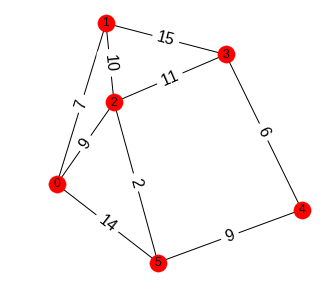

[0, 9223372036854775807, 9223372036854775807, 9223372036854775807, 9223372036854775807, 9223372036854775807]
[0, 0, 0, 0, 0, 0]
[0, 9223372036854775807, 9223372036854775807, 9223372036854775807, 9223372036854775807, 9223372036854775807]
[0, 0, 0, 0, 0, 0]
[0, 7, 9, 9223372036854775807, 9223372036854775807, 14]
[1, 0, 0, 0, 0, 0]
[0, 7, 9, 22, 9223372036854775807, 14]
[1, 1, 0, 0, 0, 0]
[0, 7, 9, 20, 9223372036854775807, 11]
[1, 1, 1, 0, 0, 0]
[0, 7, 9, 20, 20, 11]
[1, 1, 1, 0, 0, 1]
[0, 7, 9, 20, 20, 11]
[1, 1, 1, 0, 1, 1]
[0, 7, 9, 20, 20, 11]
[1, 1, 1, 1, 1, 1]


In [57]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sys
import functools
import operator

G = nx.Graph()
G.add_nodes_from(range(0, 5))
G.add_weighted_edges_from([(0, 1, 7), (0, 2, 9), 
                           (0, 5, 14), (1, 2, 10), (1, 3, 15), 
                           (2, 3, 11), (2, 5, 2), (3, 4, 6), (4, 5, 9)])

plt.figure(figsize=(5, 5))
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edge_labels(G, pos, font_size=16, edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True)})
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()


# Store edge weights in a list
graph = [ 
        [0, 7, 9, sys.maxsize, sys.maxsize, 14],
        [7, 0, 10, 15, sys.maxsize, sys.maxsize],
        [9, 10, 0, 11, sys.maxsize, 2],
        [sys.maxsize, 15, 11, 0, 6, sys.maxsize],
        [sys.maxsize, sys.maxsize, sys.maxsize, 6, 0, 9],
        [14, sys.maxsize, 2, sys.maxsize, 9, 0]]


dist_estimate = [sys.maxsize] * nx.number_of_nodes(G) 
dist_certainty = [0] * nx.number_of_nodes(G)
dist_estimate[0] = 0 # First node to itself dist = 0

# Print out initialisation
print(dist_estimate)
print(dist_certainty)



print(dist_estimate)
print(dist_certainty)

current = 0 # Start from 1st node
dist_certainty[current] = 1 # First node is visited

# Initialise the distance estimation by looking at neighbours of starting node
for i in nx.nodes(G):
  dist_estimate[i] = graph[current][i]

print(dist_estimate)
print(dist_certainty)
prev=0

#---------------------------------------------#
# Loop throught every node and its neighbours
while functools.reduce(operator.mul, dist_certainty) == 0:
  mini = sys.maxsize
  for n in nx.nodes(G): 
    # If the node has not been visited
    if dist_estimate[n] < mini and dist_certainty[n] != 1 and graph[prev][n] != sys.maxsize: 
      mini = dist_estimate[n] # Update the nearest neighbour
      current = n # Search from the nearest neighbour next time
  dist_certainty[current] = 1 # Mark this nearest neighbour as visited
  prev = current
  

  for n in nx.nodes(G): 
    # If shorter distance is found, update the distance
    if dist_estimate[n] > dist_estimate[current]+graph[current][n]: 
      dist_estimate[n] = dist_estimate[current]+graph[current][n]
  print(dist_estimate)
  print(dist_certainty)
  

      
